In [1]:
import gedsk

In [2]:
import pandas as pd
import numpy as np

In [3]:
#filename = r"D:\Codes\AllSamples\N-g127975.00430\g127975.00430"
#filename = r"D:\Codes\AllSamples\nstx_132588_00650_v2\g132588.00650"
filename = r"C:\Users\fuadh\Downloads\1_g_p45091_t0.40000\g_p45091_t0.40000"
#filename = r"D:\Codes\AllSamples\WEST_20230714\geqdsk_55799_3.5_301x301"
#filename = "geqdsks/80MW_equilibrium.geqdsk"
data = gedsk.read_gedsk(filename)
psi = gedsk.get_psi(data)

In [4]:
bounds = gedsk.get_bounds(data)
x, y = gedsk.get_xy(data)
spline = gedsk.get_spline_for_psi(psi, x, y)
#all_critical_points = gedsk.find_all_critical_points(spline, bounds, nx=50, ny=50)

In [5]:
#root = gedsk.find_critical_point_using_root(spline, 6, 0, method='hybr')

In [6]:
all_critical_points = gedsk.find_all_critical_points_using_root(spline, bounds,nx=20, ny=20, method='hybr')
all_critical_points

{(0.4788660680647085, -1.6503899884808777),
 (0.4847375070088824, 1.6424750015517917),
 (0.5609032517538417, 1.7205228117222775),
 (0.5609916736851529, -1.7276515013550569),
 (0.5872260160623454, -1.1252339287011863),
 (0.5892297794015307, 1.1337112576216948),
 (0.8963533520116217, -2.0212061641166637),
 (0.9013169353031405, 2.012828483154544),
 (1.007561344160403, 0.015577640065775427),
 (1.162164583035058, 1.4816026737881935),
 (1.166284518736127, -1.4789247391636249),
 (1.3513971602120807, -1.5988387157120465),
 (1.3574532106075141, 1.5818204530300444),
 (1.5162139970796653, -1.4711349732102978),
 (1.52357074023557, 1.0959716666122645),
 (1.5246384709910372, -1.1120322454750204),
 (1.6615665784953069, -0.3649592183221467),
 (1.6724395925841413, 0.35933829332786715),
 (1.7509132657201008, -0.9795715158641671),
 (1.7563645793449436, 0.9713465942130318),
 (1.9006434253699827, -1.9489054064000249),
 (1.9006718763157602, 1.948772875911864),
 (1.9461045586033523, -0.006107930297328256)}

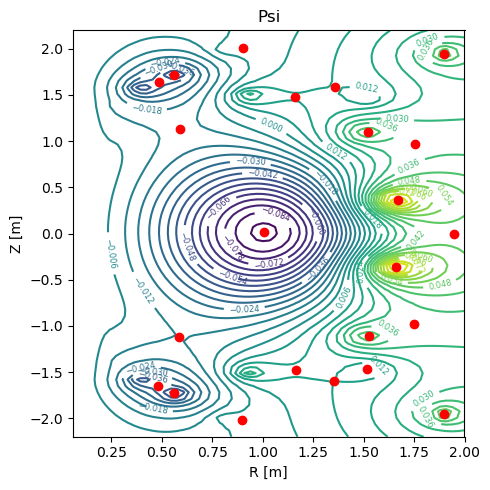

In [7]:
xx, yy = gedsk.get_meshgrid_for_psi(data)
gedsk.plotPoints_on_psi_contour(psi, xx, yy, points=all_critical_points)

In [8]:
wall_file = r"C:\Users\fuadh\Downloads\1_g_p45091_t0.40000\wallcurve.txt"
with open(wall_file, 'r') as f:
    wall_points = f.read()
# read the file as a dataframe it's a csv file with space as delimiter
wall_points = pd.read_csv(wall_file, delimiter=' ', header=None, names=['x', 'y'])
# make each column a numpy array
x = np.array(wall_points['x'])
y = np.array(wall_points['y'])

In [23]:
# find type of critical point for each point
#sorted_points = gedsk.sort_critical_points(all_critical_points, spline, bounds, gedsk.get_wall_points(filename))
sorted_points = gedsk.sort_critical_points(all_critical_points, spline, bounds, None)

sorted_points

{'maximum': [(1.6724395925841413, 0.35933829332786715),
  (1.9006434253699827, -1.9489054064000249),
  (1.6615665784953069, -0.3649592183221467),
  (1.9006718763157602, 1.948772875911864),
  (1.5246384709910372, -1.1120322454750204),
  (1.52357074023557, 1.0959716666122645)],
 'saddle': [(0.4788660680647085, -1.6503899884808777),
  (1.7509132657201008, -0.9795715158641671),
  (0.8963533520116217, -2.0212061641166637),
  (0.5872260160623454, -1.1252339287011863),
  (1.7563645793449436, 0.9713465942130318),
  (1.9461045586033523, -0.006107930297328256),
  (1.3574532106075141, 1.5818204530300444),
  (1.166284518736127, -1.4789247391636249),
  (0.5892297794015307, 1.1337112576216948),
  (0.4847375070088824, 1.6424750015517917),
  (1.162164583035058, 1.4816026737881935),
  (1.3513971602120807, -1.5988387157120465),
  (0.9013169353031405, 2.012828483154544)],
 'minimum': [(1.007561344160403, 0.015577640065775427),
  (1.5162139970796653, -1.4711349732102978),
  (0.5609916736851529, -1.7276515

In [18]:
import matplotlib.pyplot as plt

In [24]:
lims = gedsk.get_wall_points(filename)

No wall points found: LIMITR tag not found in C:\Users\fuadh\Downloads\1_g_p45091_t0.40000\g_p45091_t0.40000


No wall points found: LIMITR tag not found in C:\Users\fuadh\Downloads\1_g_p45091_t0.40000\g_p45091_t0.40000
No wall points found in C:\Users\fuadh\Downloads\1_g_p45091_t0.40000\g_p45091_t0.40000


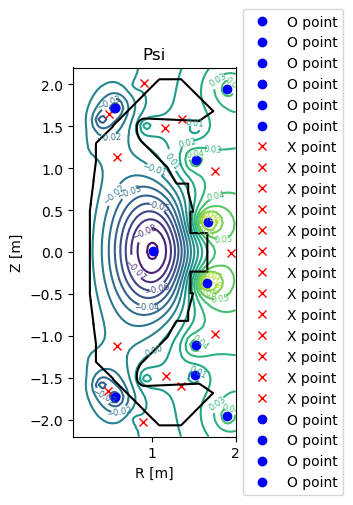

In [25]:
fig, ax = gedsk.plot_sorted_points_with_contour_with_wall(psi, xx, yy, sorted_points, filename)
ax.plot(x, y, 'k')
plt.show()

In [36]:
# create a function to plot all the separatrix curves
def plot_separatrix_curves(spline, sorted_points, xx, yy, psi):
    psi_values = []
    for xpoint in sorted_points['saddle']:
        # get the flux value of the saddle point
        psi_value = spline(xpoint[0], xpoint[1])
        psi_values.append(psi_value[0][0])
    
    psi_values = np.sort(psi_values)
    # plot the psi contour with psi values as levels
    fig, ax = plt.subplots()
    # plot the psi contour with spline
    ax.contour(xx, yy, psi, levels=psi_values)

    # get the x points and o points to plot
    x_points = sorted_points['saddle']


    # make x point two list of points of x coordinate and y coordinate
    x_points_x = [x[0] for x in x_points]; x_points_y = [x[1] for x in x_points]
    x_points = [x_points_x, x_points_y]
    # make o point two list of points of x coordinate and y coordinate
    #o_points_x = [x[0] for x in o_points]; o_points_y = [x[1] for x in o_points]
    #o_points = [o_points_x, o_points_y]

    # plot the x points and o points
    ax.plot(x_points[0], x_points[1], 'rx', label='x points')
    #ax.plot(o_points[0], o_points[1], 'bo', label='o points')
    # equal aspect ratio
    ax.set_aspect('equal')
    # legend outside the plot
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return fig, ax




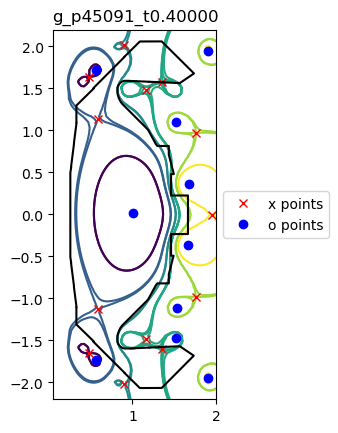

In [27]:
fig, ax = plot_separatrix_curves(spline, sorted_points, xx, yy, psi)
ax.plot(x, y, 'k')
ax.title.set_text("g_p45091_t0.40000")
plt.show()

In [30]:
# get the sorted points for the separatrix curves using the wall information
sorted_points_with_wall = gedsk.sort_critical_points(all_critical_points, spline, bounds, lims=(x,y))


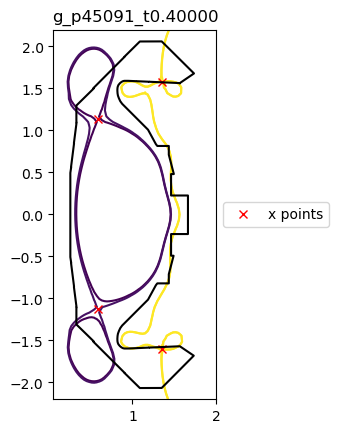

In [37]:
fig, ax = plot_separatrix_curves(spline, sorted_points_with_wall, xx, yy, psi)
ax.plot(x, y, 'k')
ax.title.set_text("g_p45091_t0.40000")
plt.show()